In [242]:
#About the data:

#race:
#W: White, non-Hispanic
#B: Black, non-Hispanic
#A: Asian
#N: Native American
#H: Hispanic
#O: Other
#None: unknown

#gender:
#M: Male
#F: Female
#None: unknown

In [244]:
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScale
import os
import numpy as np  
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
sns.set()
from collections import Counter
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "/Users/mansipandya/Desktop/Police-shootings"]).decode("utf8"))

fatal-police-shootings-data.csv



In [245]:
#read the data
kill = pd.read_csv('/Users/mansipandya/Desktop/Police-shootings/fatal-police-shootings-data.csv', encoding="windows-1252")

In [246]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [247]:
len(kill)

5416

In [248]:
kill.describe()

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


In [249]:
kill.head(100)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,133,Vincent Cordaro,2015-02-08,shot,gun,57.0,M,W,New City,NY,True,attack,Not fleeing,False
96,134,Joseph Paffen,2015-02-08,shot,gun,46.0,M,W,Orange County,FL,False,attack,Not fleeing,False
97,135,Larry Hostetter,2015-02-08,shot,gun,41.0,M,W,Nocona,TX,False,attack,Not fleeing,False
98,136,Kenneth Kreyssig,2015-02-09,shot,gun,61.0,M,W,Smyrna,ME,True,undetermined,Not fleeing,False


In [250]:
#cleaning the data
#Most common 10 Name or Surname of killed people
separate=kill.name[ kill.name != 'TK TK']
print(separate)
print(type(separate)) #//series


separate = kill.name[kill.name != 'TK TK'].str  #now they are string objects series
print(type(separate))

separate=kill.name[kill.name != 'TK TK' ].str.split()
print(separate.loc[:10]) #We select the names that are not tk tk and then we convert it 
                          #into the string object series then by using split method we separated name and surname

a,b = zip(*separate) #unzipping the names and surnames
print(a[:10]) #This gives the names tuple (list of names)
print(b[:10]) #This gives the surname tuple (list of surnames)

0               Tim Elliot
1         Lewis Lee Lembke
2       John Paul Quintero
3          Matthew Hoffman
4        Michael Rodriguez
               ...        
5408       Rayshard Brooks
5409        Caine Van Pelt
5410          Hannah Fizer
5411        William Slyter
5413        Nicholas Hirsh
Name: name, Length: 5229, dtype: object
<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.StringMethods'>
0               [Tim, Elliot]
1        [Lewis, Lee, Lembke]
2      [John, Paul, Quintero]
3          [Matthew, Hoffman]
4        [Michael, Rodriguez]
5       [Kenneth, Joe, Brown]
6     [Kenneth, Arnold, Buck]
7            [Brock, Nichols]
8            [Autumn, Steele]
9         [Leslie, Sapp, III]
10          [Patrick, Wetter]
Name: name, dtype: object
('Tim', 'Lewis', 'John', 'Matthew', 'Michael', 'Kenneth', 'Kenneth', 'Brock', 'Autumn', 'Leslie')
('Elliot', 'Lee', 'Paul', 'Hoffman', 'Rodriguez', 'Joe', 'Arnold', 'Nichols', 'Steele', 'Sapp')


In [251]:
names_list = a + b 
#print(names_list[0])
#print(type(names_list)) #after concatenation we got another tuple
#rint(names_list)
name_count = Counter(names_list) #it produces a dictionary that indicates the names and frequencies
most_common_names = name_count.most_common(10) # then find the most frequent name or surname
print(most_common_names) # we see the dictionary at the output
x,y = zip(*most_common_names)# again unzip but this time we are unzippin the names and their frequencies 
#print(type(x)) #this is tuple we'll convert it to list initiallly




[('Michael', 198), ('James', 129), ('David', 125), ('Robert', 103), ('William', 97), ('John', 95), ('Christopher', 90), ('Anthony', 87), ('Daniel', 85), ('Joseph', 85)]


['Michael', 'James', 'David', 'Robert', 'William', 'John', 'Christopher', 'Anthony', 'Daniel', 'Joseph'] [198, 129, 125, 103, 97, 95, 90, 87, 85, 85]


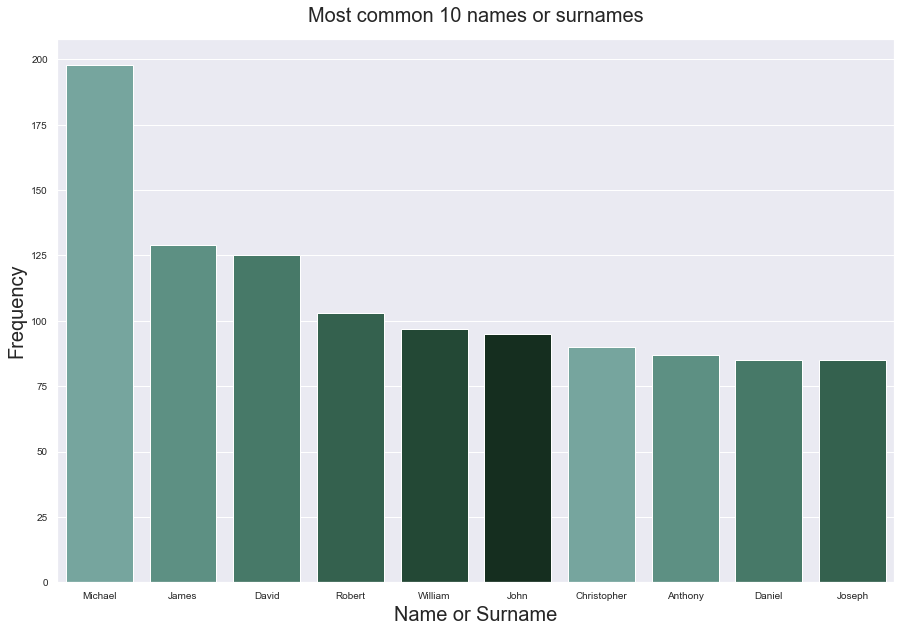

In [252]:
#Visualization
x,y = list(x),list(y) #x holds the names and surnames, y holds the frequencies
print(x,y)
sns.set(font_scale = 2.0)
plt.figure(figsize = (15,10))
ax = sns.barplot(x,y, palette = sns.color_palette("ch:2,r=.2,l=.6"))
plt.title("Most common 10 names or surnames", fontsize=20, y=1.02)
plt.xlabel('Name or Surname', fontsize=20, labelpad=5)
plt.ylabel('Frequency', fontsize=20, labelpad=5)
plt.tick_params(labelsize=10)

In [253]:
# Race rates according in kill data 
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index

#Here let's have a look at value_counts()
print( type( kill.race.value_counts()) )
print( kill.race.value_counts())
#It is a list like,returns the numbers of each type
#W  1201  //white
#B  618   //black 
#H  423   //hispanic

#And now what is index ?

print( kill.race.value_counts().index )
#Index(['W', 'B', 'H', 'A', 'N', 'O'] // indexes are

colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
#explode : array-like, optional, default: None
#If not None, is a len(x) array which specifies the fraction of the radius with which to offset each wedge.

sizes = kill.race.value_counts().values
#[1201  618  423   39   31   28]

print(sizes)

<class 'pandas.core.series.Series'>
W    2476
B    1298
H     902
A      93
N      78
O      48
Name: race, dtype: int64
Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')
[2476 1298  902   93   78   48]


Text(0.5, 1.0, 'Killed People According to Races')

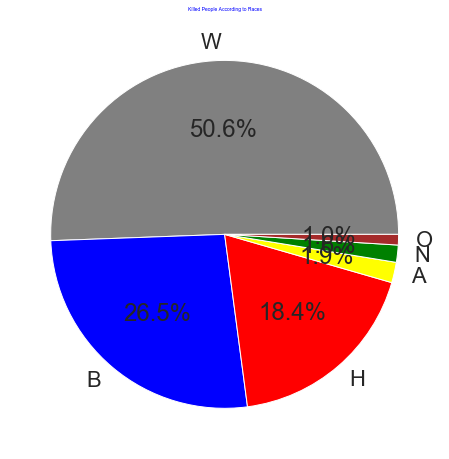

In [254]:
# visual
plt.figure(figsize = (20,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races', color = 'blue', fontsize = 5)

['shot' 'shot and Tasered']


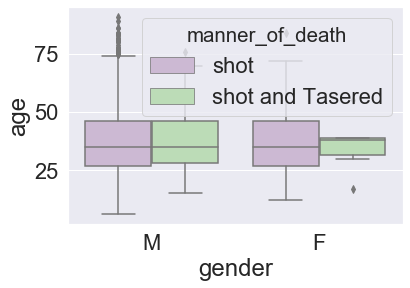

In [255]:
print(kill.manner_of_death.unique())
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

#the average ages are closed to each other

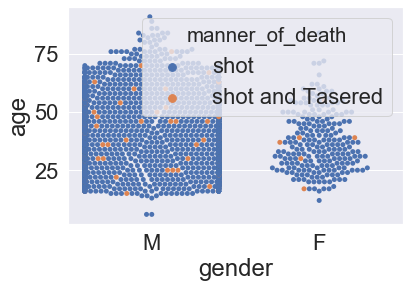

In [256]:
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill)
plt.show()

#if there is a clear separation between the blue points and orange points then we should use this feature it is more understandable

Text(0.5, 1.0, 'gender')

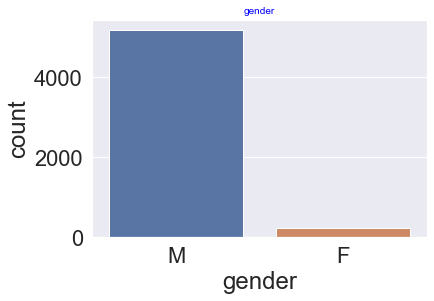

In [257]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender", color = 'blue',fontsize=10)

Text(0.5, 1.0, 'Kill weapon')

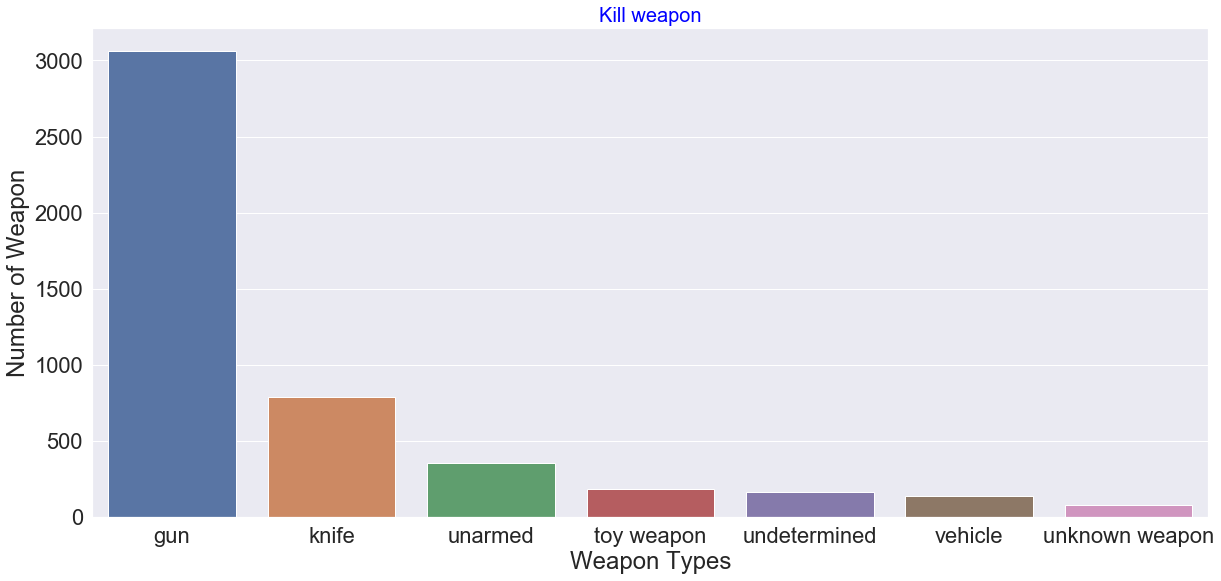

In [258]:
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(20,9))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=20)

Text(0.5, 1.0, 'Age of killed people')

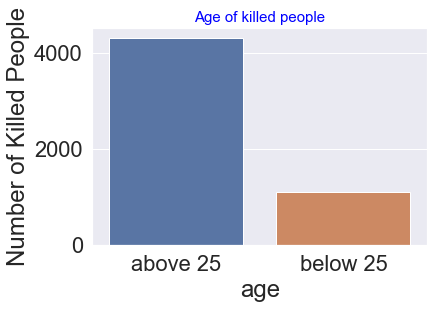

In [259]:
# age of killed people
above25 =['above 25' if i >= 25 else 'below 25' for i in kill.age]
df = pd.DataFrame({'age':above25}) # we've created a dataframe with one column named as age
#print(type(df.age))
sns.countplot(x=df.age) # one column of a data frame is called series with its column name  as a label
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Race of killed people')

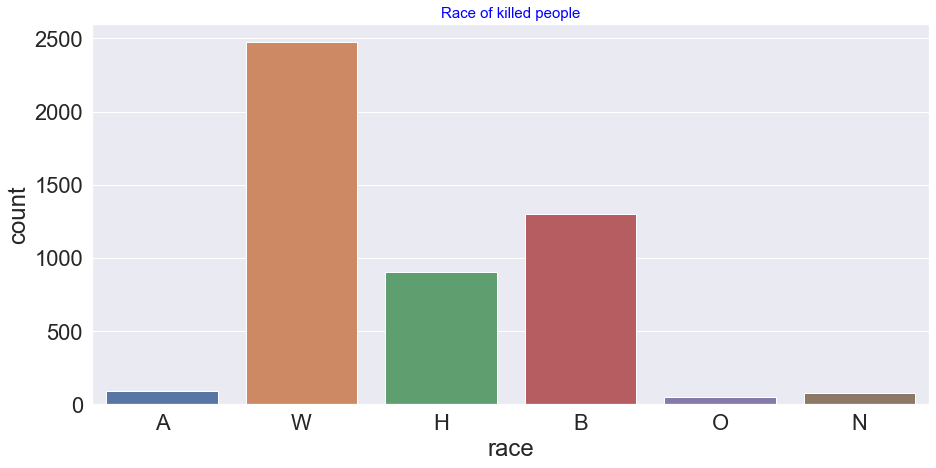

In [260]:
# Race of killed people
plt.figure(figsize=(15,7))
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Most dangerous cities')

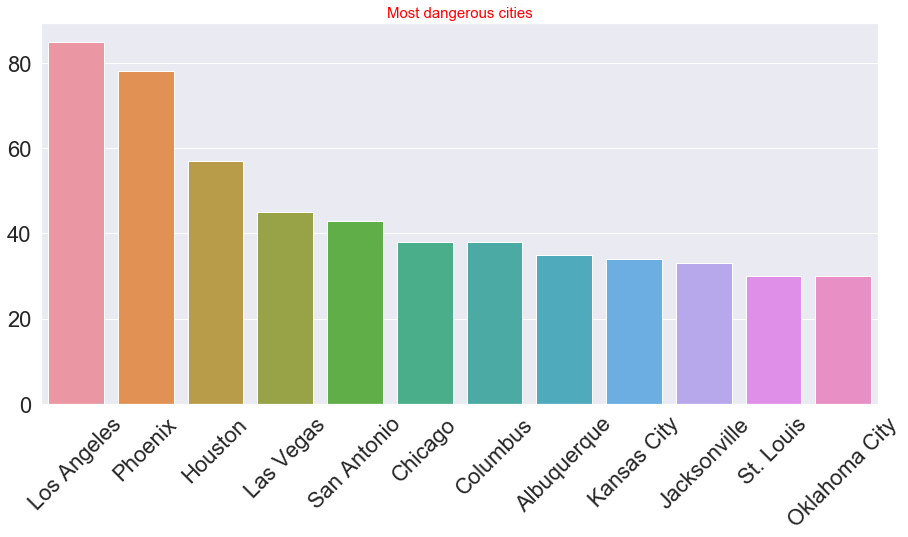

In [261]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(15,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'red',fontsize=15)

Text(0.5, 1.0, 'Most dangerous state')

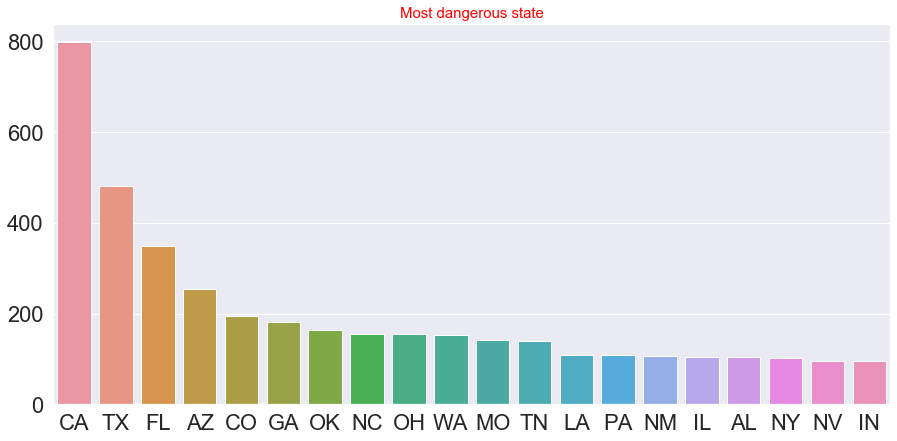

In [262]:
# most dangerous states
state = kill.state.value_counts()
plt.figure(figsize=(15,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'red',fontsize=15)

Text(0.5, 1.0, 'Kill Numbers from States')

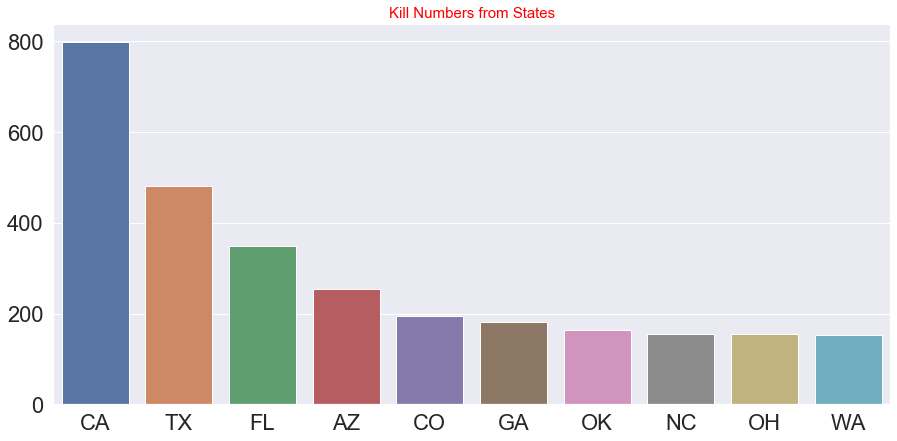

In [263]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
plt.figure(figsize=(15,7))
#print( type(kill.state.value_counts().index))
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'red',fontsize=15)


In [264]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [265]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [266]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [269]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# fatal_encounters_dot_org.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/Users/mansipandya/Desktop/Police-shootings/fatal-police-shootings-data.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'fatal-police-shootings-data.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 14 columns


In [270]:
df2.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


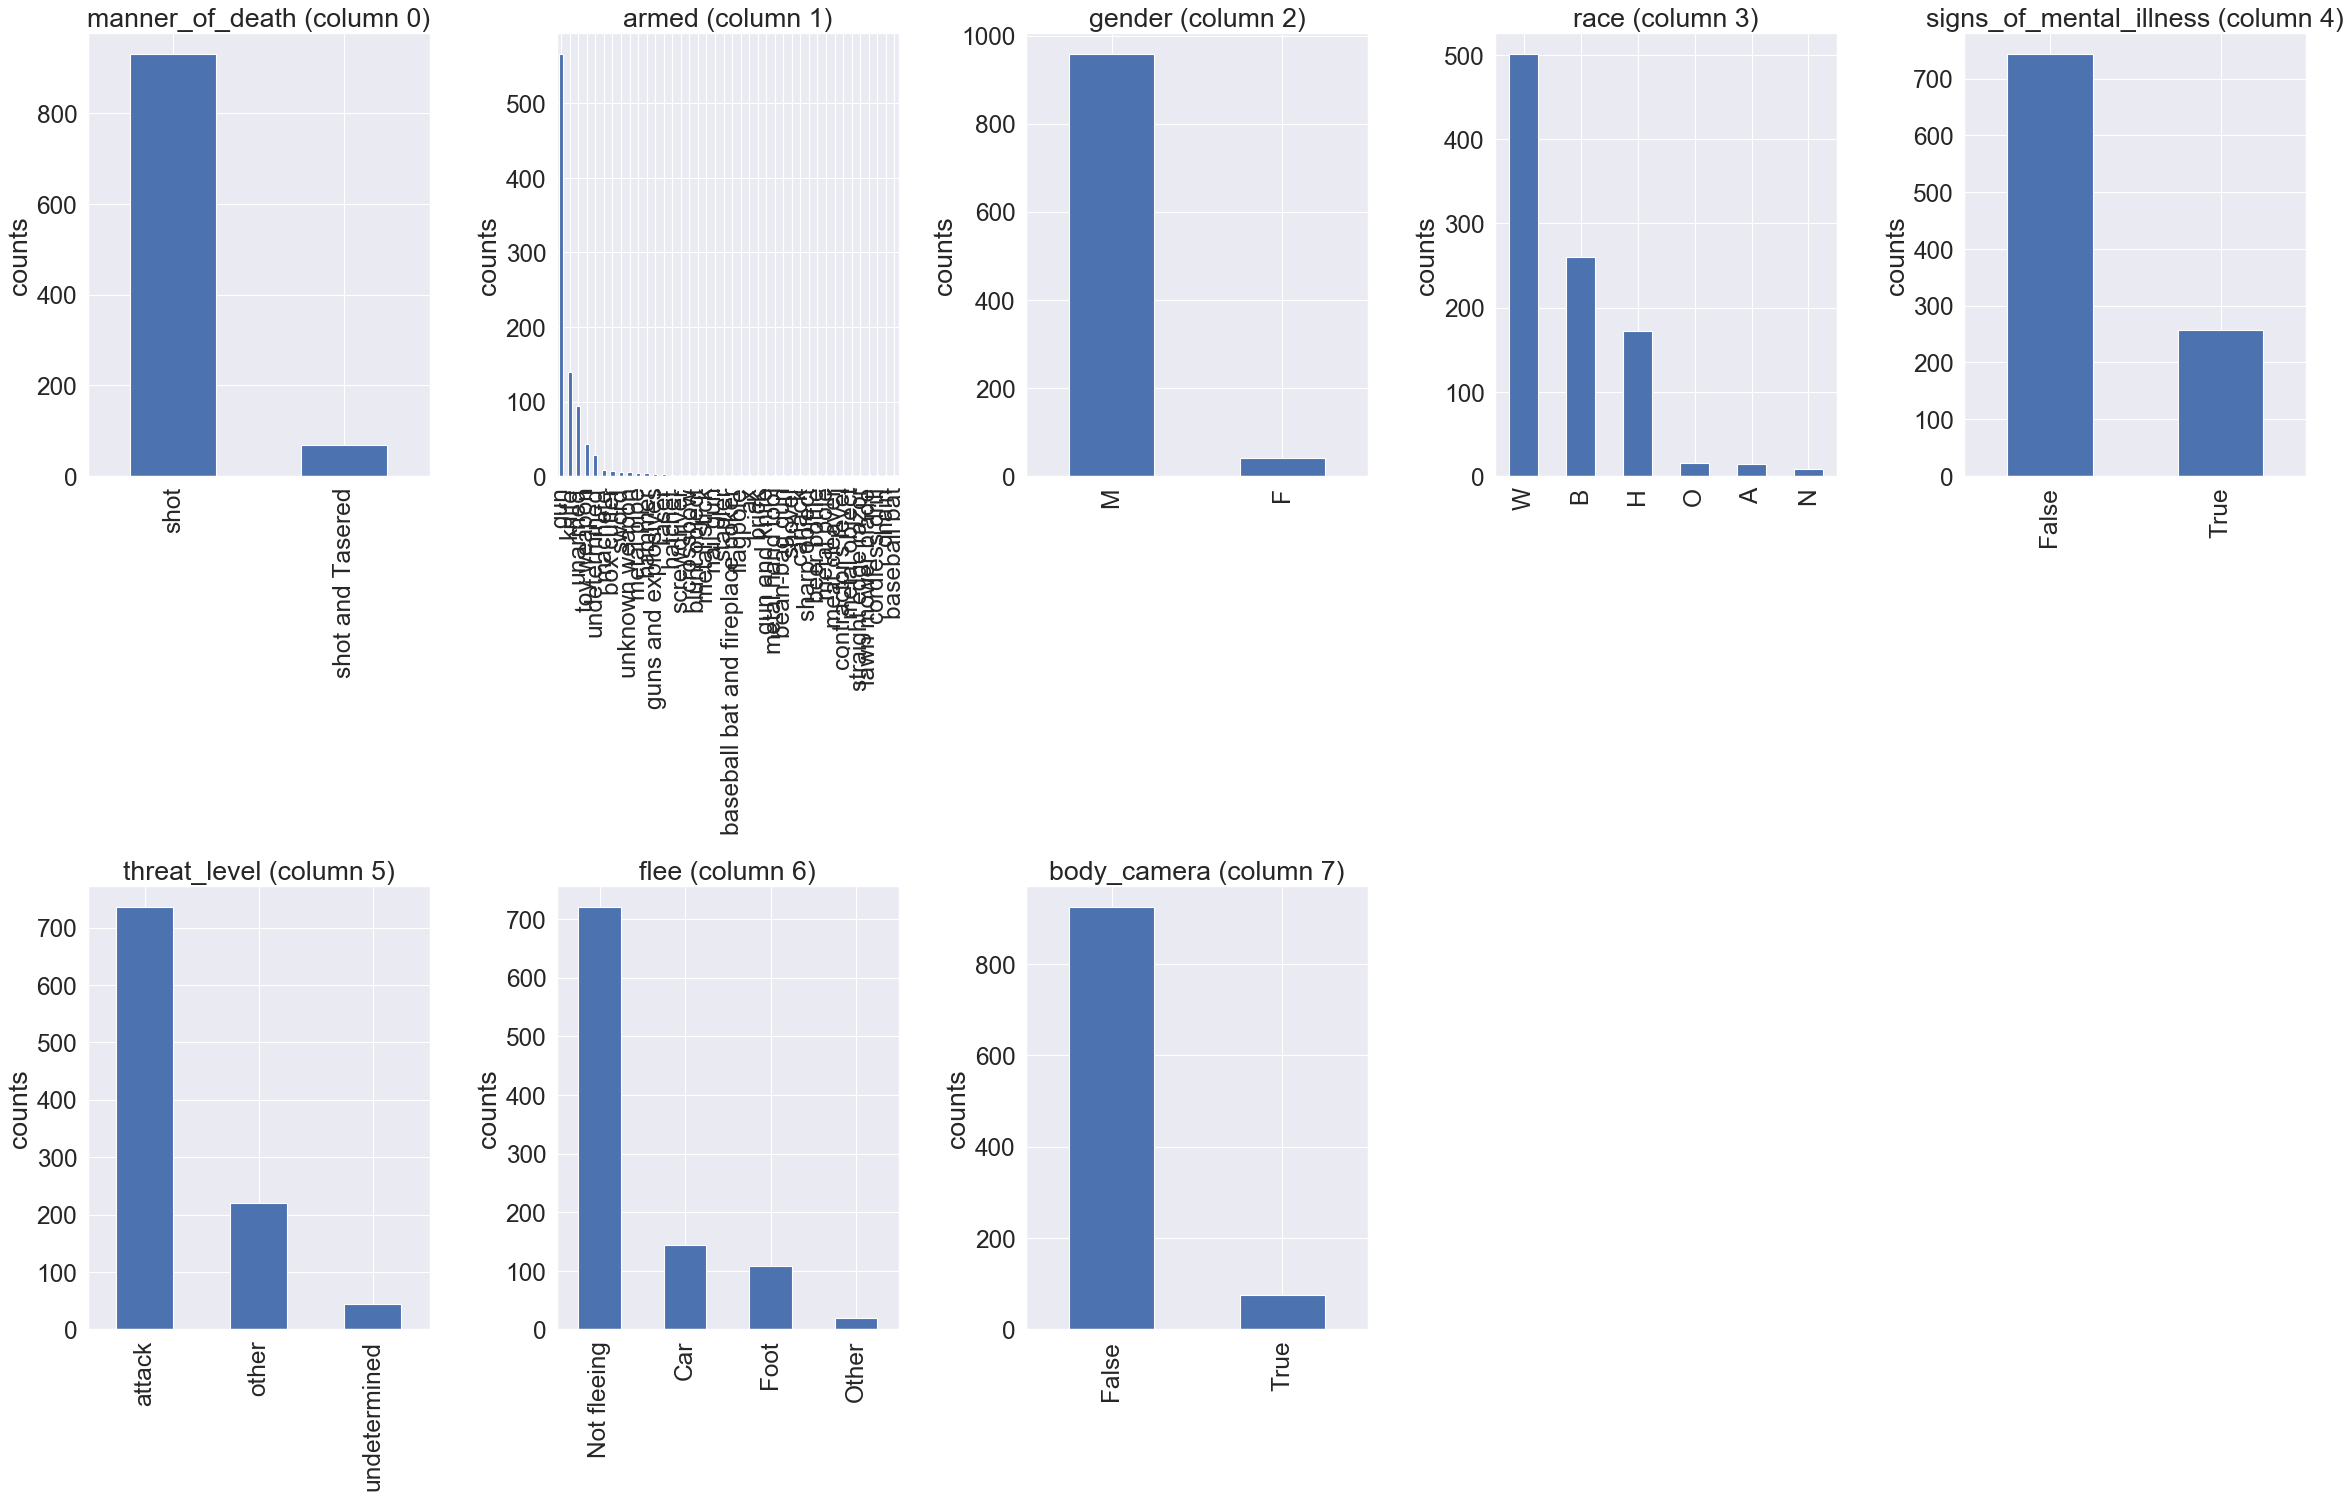

In [272]:
#Distribution graphs (histogram/bar graph) of sampled columns:
plotPerColumnDistribution(df2, 10, 5)

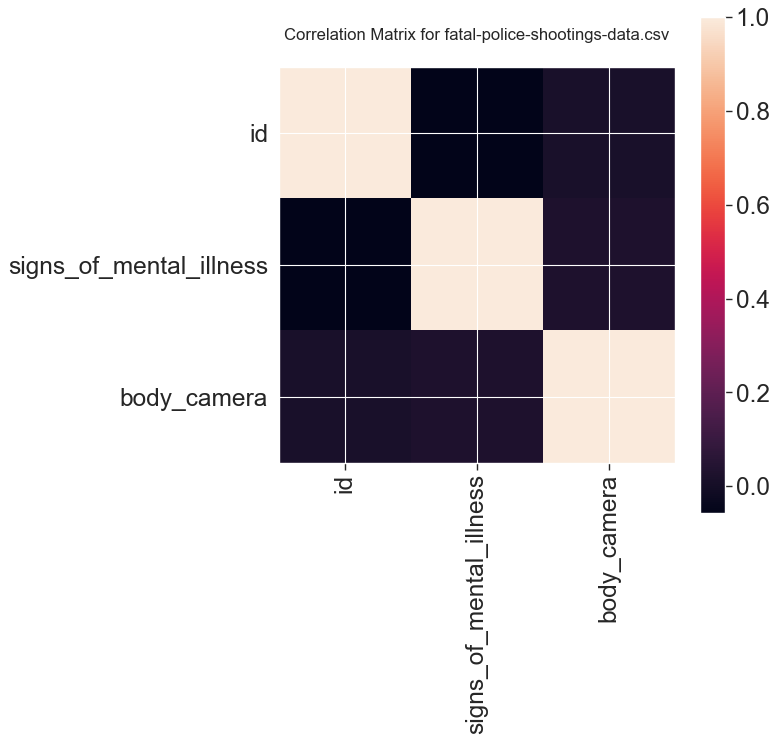

In [273]:
#Correlation matrix
plotCorrelationMatrix(df2, 8)

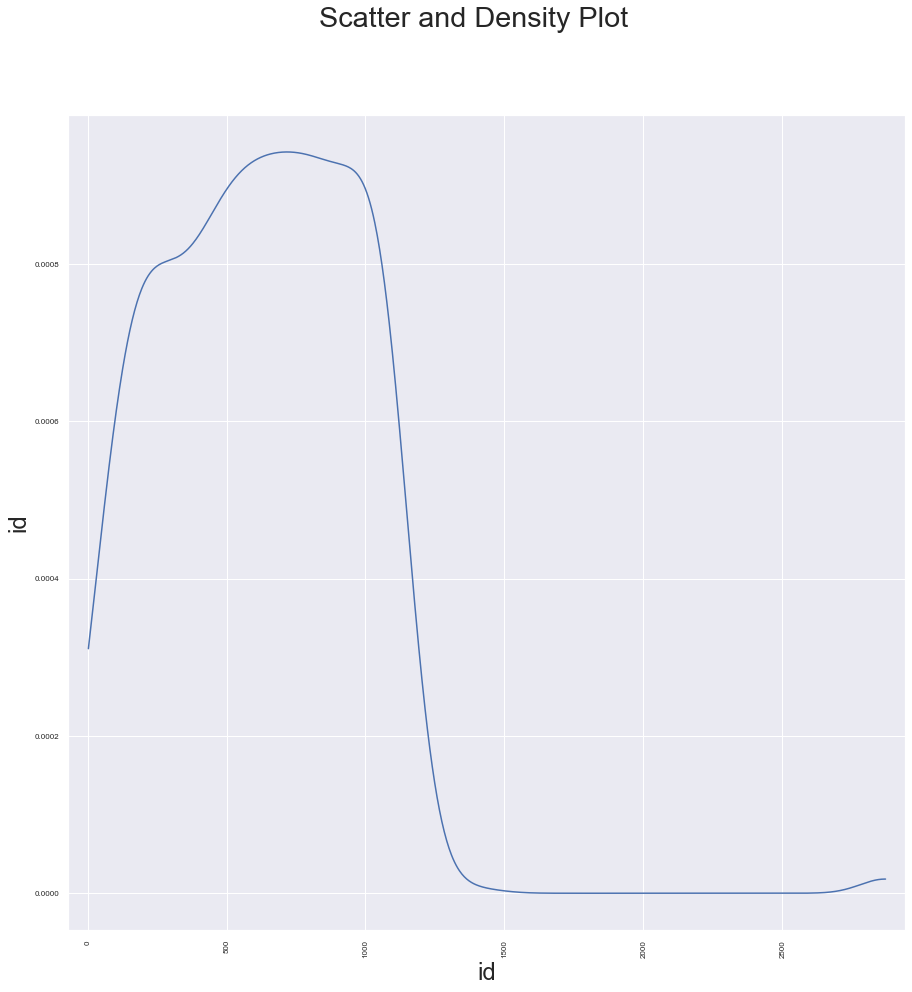

In [277]:
#Scatter and density plots:
plotScatterMatrix(df2, 15, 5)